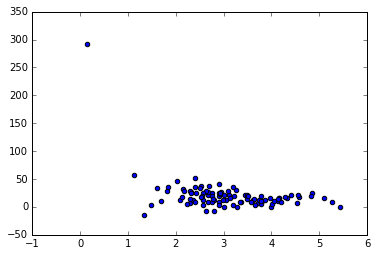

In [9]:
# First Lets create a Polynomial Data Set

%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)
pageSpeeds  = np.random.normal(3.0, 1.0, 100)
purchaseValue = np.random.normal(50.0,30.0,100)/pageSpeeds

scatter(pageSpeeds, purchaseValue)

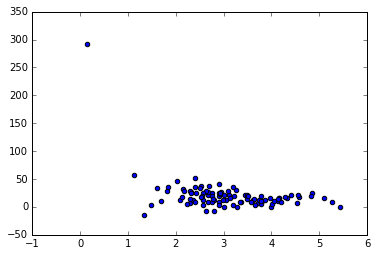

In [18]:
#Split the data Sets

trainX = pageSpeeds[:80]
trainY = purchaseValue[:80]

testX = pageSpeeds[80:]
testY = purchaseValue[80:]

#Lets see how the train Set pans out

scatter(trainX, trainY)


In [44]:
# lets validate the length to be sure

len(testX), len(testY)

(20, 20)

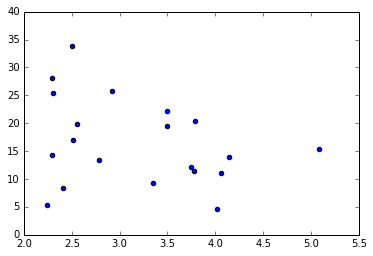

In [19]:
scatter(testX, testY)

In [29]:
#Lets fit an 8 degre poly Regre on this
#first convert to Arrays

x = np.array(trainX)
y = np.array(trainY)



p4 = np.poly1d(np.polyfit(x, y, 8))
print p4


         8        7         6         5        4        3        2
-0.3881 x + 9.33 x - 93.45 x + 502.4 x - 1550 x + 2698 x - 2342 x + 584.6 x + 249.4


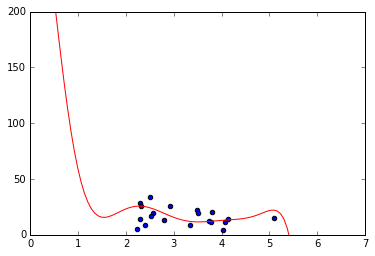

In [49]:
#now lets plot

import matplotlib.pyplot as plt

#lets get some evenly spaced numbers
xp = np.linspace(0,7,100)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0,200])

plt.scatter(testX,testY)

plt.plot(xp, p4(xp), 'r')
plt.show()

In [41]:
#how good or bad is this 
#lets get r squared from sciencekit learn

from sklearn.metrics import r2_score

r2 = r2_score(testY, p4(testX))
print r2

#0 = terrible fit
#1 perfect fit

-0.281814410733


In [42]:
#lets get this numeber for test data

r2 = r2_score(trainY, p4(trainX))

print r2

0.875726046699


In [55]:
#Lets check if lowered order polynomial fits
expo = range(0,15)
#initialise and array
rSquaredRange=[]

#Find r squared for various Degrees
for degree in expo:
    fit = np.poly1d(np.polyfit(x,y,degree))
    
    
    res = r2_score(testY, fit(testX))
    print degree, res
    rSquaredRange.append(res)


0 -0.331832418159
1 -1.56369005332
2 -1.30416200834
3 -0.719058899606
4 0.0110258734945
5 -0.10582775739
6 -0.108815500325
7 -0.142049196024
8 -0.281814410733
9 -0.31818059994
10 -0.302906455215
11 -0.189752349791
12 -0.110270913853
13 -0.759750752142
14 -0.727714252662


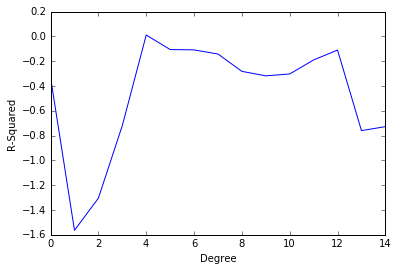

In [56]:
# Lets plot this Expo to Rsquared Range
plt.plot(expo, rSquaredRange)

plt.xlabel('Degree')
plt.ylabel('R-Squared')
plt.show()